In [70]:
# Import the required libraries
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [71]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [72]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [73]:
# Define the model architecture
model = Sequential()
model.add(Dense(28, input_shape=(28*28,), activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 28)                21980     
                                                                 
 dense_39 (Dense)            (None, 14)                406       
                                                                 
 dense_40 (Dense)            (None, 10)                150       
                                                                 


Total params: 22,536
Trainable params: 22,536
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [75]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3404 - accuracy: 0.8979 - val_loss: 0.2068 - val_accuracy: 0.9373
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1833 - accuracy: 0.9451 - val_loss: 0.1967 - val_accuracy: 0.9423
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1603 - accuracy: 0.9529 - val_loss: 0.1822 - val_accuracy: 0.9486
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1394 - accuracy: 0.9581 - val_loss: 0.1999 - val_accuracy: 0.9438
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1311 - accuracy: 0.9611 - val_loss: 0.1686 - val_accuracy: 0.9533
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1262 - accuracy: 0.9626 - val_loss: 0.1954 - val_accuracy: 0.9491
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.1210 - accuracy: 0.9631 - val_loss: 0.1643 - val_accuracy: 0.9576
Epoch 

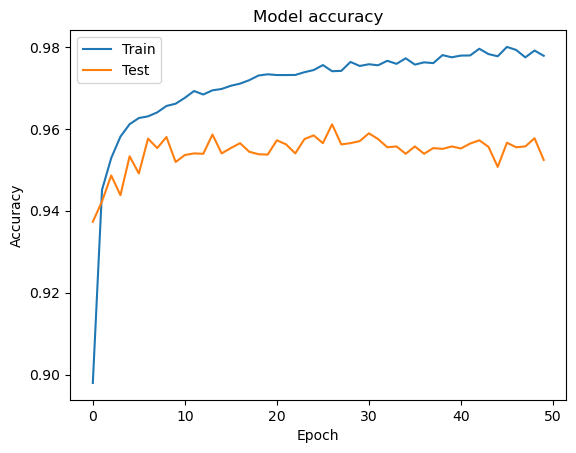

In [78]:
# Plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [79]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", scores[1])

Test accuracy: 0.9524000287055969
